##Connect to drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pwd
# Change directory
%cd ../content/gdrive/MyDrive/Colab Notebooks/Kaggle/NLP0
!pwd

/content
/content/gdrive/MyDrive/Colab Notebooks/Kaggle/NLP0
/content/gdrive/MyDrive/Colab Notebooks/Kaggle/NLP0


# Setup

Libraries

In [109]:
import pandas as pd
import zipfile
# NLTK
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
# Plots
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create data folder
#%mkdir data

#Data preparation

## Extract data

In [ ]:
# Extract from xip file
# with zipfile.ZipFile("nlp-getting-started.zip", 'r') as zip_ref:
#     zip_ref.extractall("data")

In [36]:
# read in training data
data = pd.read_csv("data/train.csv")
data.reset_index(inplace=True)

In [5]:
# data info
print("Shape:",data.shape)
print("Columns:\n",data.columns)
print(data.head(5))
print("Missing volumes:\n",data.isna().sum())

Shape: (7613, 5)
Columns:
 Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Missing volumes:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


## Create helper ds

In [50]:
# Sentences into list
sent_all = []
sent_idx = []
for s in range(len(data)):
  sent_all += sent_tokenize(data.text[s])
  sent_idx += [s]*len(sent_tokenize(data.text[s]))
print(sent_all[:3])
print(sent_idx[:3])

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask.', 'Canada']
[0, 1, 1]


In [ ]:
# Combine into dataframe
sent = pd.DataFrame()
sent['idx'] = sent_idx
sent['sent'] = sent_all
sent

In [ ]:
# Combine all words
words_all = []
words_idx = []
for s in range(len(data)):
  words_all += word_tokenize(data.text[s])
  words_idx += [s]*len(word_tokenize(data.text[s]))
print(words_all[:3])
print(words_idx[:3])

In [ ]:
# Combine into dataframe
words = pd.DataFrame()
words['idx'] = words_idx
words['word'] = words_all
words

In [ ]:
# Remove punctuation
words_pnk = []
for w in range(len(words)):
  if words.word[w].isalpha():
    words_pnk.append(words.loc[w])
words_pnk = pd.DataFrame(words_pnk, columns = words.columns)
words_pnk.reset_index(inplace=True, drop=True)
words_pnk[4:]

In [ ]:
# Remove stopwords
stpwords = stopwords.words("english")
words_stp = []
for w in range(len(words_pnk)):
  if words_pnk.word[w] not in stpwords:
    words_stp.append(words_pnk.loc[w])
words_stp = pd.DataFrame(words_stp, columns = words.columns)
words_stp.reset_index(inplace=True, drop=True)
words_stp

In [121]:
# Stemming
porter = PorterStemmer()
for w in range(len(words_stp)):
  words_stp.loc[w,'word_ste'] = porter.stem(words_stp.word.loc[w])
words_stp

,idx,words,word_ste
0,0,Our,our
1,0,Deeds,deed
2,0,Reason,reason
3,0,earthquake,earthquak
4,0,May,may
...,...,...,...
76258,7612,California,california
76259,7612,Wildfire,wildfir
76260,7612,ABC,abc
76261,7612,News,new


## Describe

[('http', 4716), ('I', 1546), ('the', 641), ('like', 408), ('fire', 355), ('amp', 344), ('new', 339), ('get', 309), ('A', 300), ('bomb', 230)]


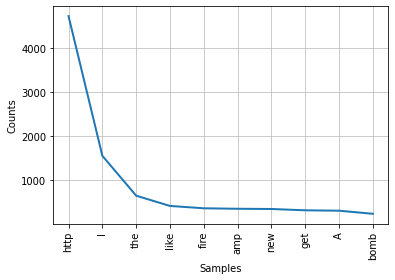

In [122]:
# Words frequencies
#fdist = FreqDist(words.word)
#fdist = FreqDist(words_pnk.word)
#fdist = FreqDist(words_stp.word)
fdist = FreqDist(words_stp.word_ste)
print(fdist.most_common(10))
fdist.plot(10)

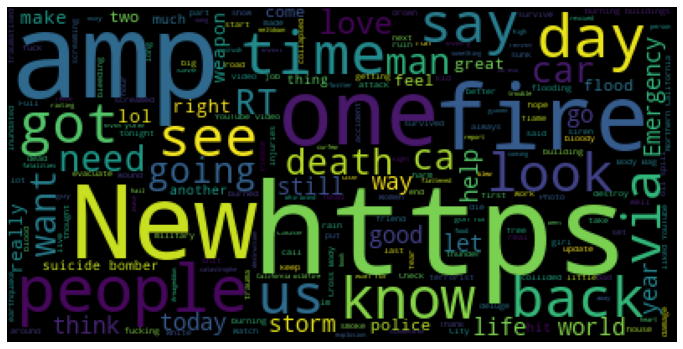

In [108]:
# Cloud of words
wordcloud = WordCloud().generate(" ".join(words_stp.words))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [106]:
" ".join(words_stp.words)

'Our Deeds Reason earthquake May ALLAH Forgive us Forest fire near La Ronge Sask Canada All residents asked place notified officers No evacuation shelter place orders expected people receive wildfires evacuation orders California Just got sent photo Ruby Alaska smoke wildfires pours school RockyFire Update California Hwy closed directions due Lake County fire CAfire wildfires flood disaster Heavy rain causes flash flooding streets Manitou Colorado Springs areas I top hill I see fire woods There emergency evacuation happening building across street I afraid tornado coming area Three people died heat wave far Haha South Tampa getting flooded WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GON NA DO WHAT AM I GON NA DO FVCK flooding raining flooding Florida TampaBay Tampa days I lost count Flood Bago Myanmar We arrived Bago Damage school bus multi car crash BREAKING What man I love fruits Summer lovely My car fast What goooooooaaaaaal ridiculous London cool Love skiing What wonderful day LO